In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io


No handles with labels found to put in legend.


Top principal component is  [-0.70710678 -0.70710678]
Projection of the first example is 1.496.
Recovered approximation of the first example is  [-1.05805279 -1.05805279]


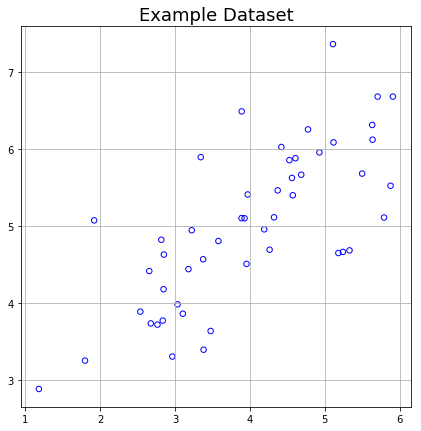

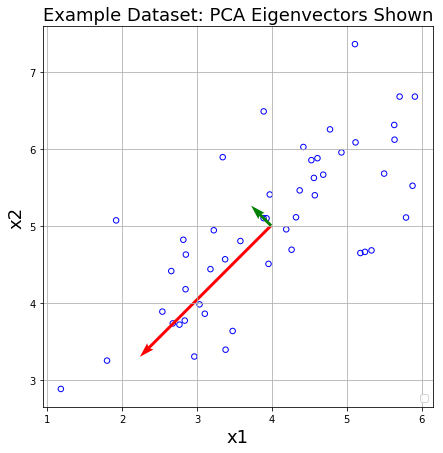

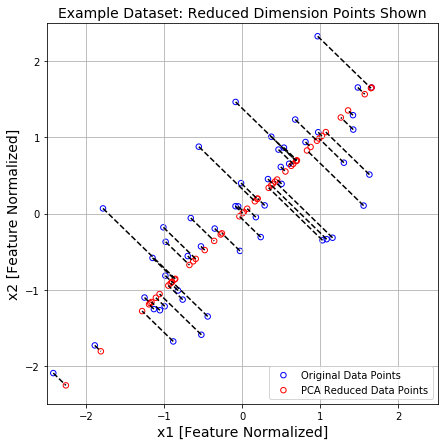

In [360]:
def feature_normalize(samples):
    """
    Feature-normalize samples
    :param samples: samples.
    :return: normalized feature
    """
    return (samples - samples.mean(axis=0)) / samples.std(axis=0)


def get_usv(samples_norm):
    cov_mat = (samples_norm.T @ samples_norm) / samples_norm.shape[0]
    return scipy.linalg.svd(cov_mat, full_matrices=True)


def project_data(samples, U, K):
    """
    Computes the reduced data representation when
    projecting only on to the top "K" eigenvectors
    """

    # Reduced U is the first "K" columns in U
    reduced_U = U[:, :K]
    return samples @ reduced_U

    


def recover_data(Z, U, K):
    return z @ U[:, :K].T


def main():
    datafile = 'data/data1.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']

    plt.figure(figsize=(7, 7))
    plt.scatter(samples[:, 0], samples[:, 1], s=30, facecolors='none', edgecolors='b')
    plt.title("Example Dataset", fontsize=18)
    plt.grid(True)
    # Feature normalize

    samples_norm = feature_normalize(samples)

    # Run SVD
    
    

    U, s, v = get_usv(samples_norm)

    # output the top principal component (eigen- vector) found
    # should expect to see an output of about [-0.707 -0.707]"
    print('Top principal component is ', U[:, 0])


    plt.figure(figsize=(7, 7))
    plt.scatter(samples[:, 0], samples[:, 1], s=30, facecolors='none', edgecolors='b')
    plt.title("Example Dataset: PCA Eigenvectors Shown", fontsize=18)
    plt.xlabel('x1', fontsize=18)
    plt.ylabel('x2', fontsize=18)
    plt.grid(True)
    # To draw the principal component, you draw them starting
    # at the mean of the data
    m = samples.mean(axis=0)
    
    plt.quiver(m[0], m[1], U[:, 0], U[:, 1], units='x', scale=0.7/s, color=['r', 'g'])


#     plt.plot([0, U[0,0]*2]+m[0], [0, U[0,1]*2]+m[1],'r',label='First Principal Component')
#     plt.plot([0, U[1,0]]+m[0], [0, U[1,1]]+m[1], 'g', label='Second Principal Component')

    # IMPLEMENT PLOT

    plt.legend(loc=4)

    # project the first example onto the first dimension
    # should see a value of about 1.481"

    z = project_data(samples_norm, U, 1)
    print('Projection of the first example is %0.3f.' % float(z[0]))
    recovered_sample = recover_data(z, U, 1)
    print('Recovered approximation of the first example is ', recovered_sample[0])

    plt.figure(figsize=(7, 7))
    plt.scatter(samples_norm[:, 0], samples_norm[:, 1], s=30, facecolors='none',
                edgecolors='b', label='Original Data Points')
    plt.scatter(recovered_sample[:, 0], recovered_sample[:, 1], s=30, facecolors='none',
                edgecolors='r', label='PCA Reduced Data Points')

    plt.title("Example Dataset: Reduced Dimension Points Shown", fontsize=14)
    plt.xlabel('x1 [Feature Normalized]', fontsize=14)
    plt.ylabel('x2 [Feature Normalized]', fontsize=14)
    plt.grid(True)

    for x in range(samples_norm.shape[0]):
        plt.plot([samples_norm[x, 0], recovered_sample[x, 0]], [samples_norm[x, 1], recovered_sample[x, 1]], 'k--')

    plt.legend(loc=4)
    plt.xlim((-2.5, 2.5))
    plt.ylim((-2.5, 2.5))
    plt.show()


if __name__ == '__main__':
    main()


In [336]:
samples_norm

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

In [195]:
datafile = 'data/data1.mat'
mat = scipy.io.loadmat(datafile)
samples = mat['X']

# Feature normalize

samples_norm = feature_normalize(samples)

# Run SVD

cov_mat = (samples_norm.T @ samples_norm) / samples_norm.shape[0]

U, s, v = get_usv(cov_mat)

# output the top principal component (eigen- vector) found
# should expect to see an output of about [-0.707 -0.707]"
print('Top principal component is ', U[:, 0])


Top principal component is  [-0.70710678 -0.70710678]


In [335]:
samples_norm

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

In [196]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [245]:
s

array([1.73553038, 0.26446962])

In [198]:
m = samples.mean(axis=0)
m

array([3.98926528, 5.00280585])

[1.73553038 0.26446962]


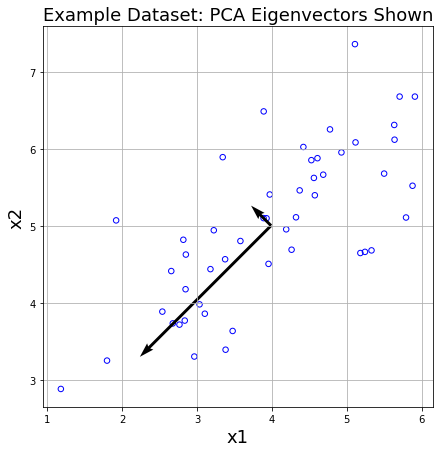

In [358]:


plt.figure(figsize=(7, 7))
plt.scatter(samples[:, 0], samples[:, 1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown", fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.grid(True)
# To draw the principal component, you draw them starting
# at the mean of the data
m = samples.mean(axis=0)
print(s)
plt.quiver(m[0], m[1], U[:, 0], U[:, 1], units='x', scale=0.7/s)
# plt.quiver(m[0], m[1], U[0][0], U[1][0], units='inches', scale=s[1])
# plt.quiver(m[0], m[1], U[0][1], U[1][1], units='inches',scale=s[0])
# plt.quiver(m[0],m[1], U[0], U[1])

# plt.quiver(m[0], m[1], U[, s[ 1])
#     plt.plot([0, U[0,0]*2]+m[0], [0, U[0,1]*2]+m[1],'r',label='First Principal Component')
#     plt.plot([0, U[1,0]]+m[0], [0, U[1,1]]+m[1], 'g', label='Second Principal Component')